# CMSC478 Machine Learning - Spring 2021 

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-1: Binary Classification - Stock Market Prediction</font>

Sam Bailor - VK96692

## Overview and Learning Objectives

So far, you've learned very important fundamental concepts in Machine Learning such as supervised learning (e.g. classification and regression) vs unsupervised learning (e.g. clustering), overfitting, model evaluation, and performance measures (accuracy, precision, recall, AUC, MSE, etc.). You've learned that two of the most common approaches in supervised learning are regression and classification. In this assignment, you are going to practice what you've learned so far by building ML models and applying them on data.

The ML task in this assignment is binary classification, stock market prediction, based on daily news dataset. 

<b>Very Important Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping instructions are major sources of making mistakes and losing points in your assignments! Also notice that this assignment has three parts and includes multiple steps and questions. You're strongly recommended to get started early and plan to finish well before the due date. Technical problems or other issues/questions on the due date or just a day before would NOT be accepted as an excuse for extension. As stated in the policy, ALL assignments are indvidual tasks and students are strictly prohibited from collaboration on assignments. Students are responsible to debug the code and resolve any errors that may arise. Students should NOT share any answer, solution, or code/snippet with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML methods in practice. 
- learn how to work with ML libraries: Scikit-learn and XGBoost
- practice reading documentation. This is a very important skill in ML/Data Science collaborative environments and teams.

Wherever needed, you should replace `...` elipsis with your code. `...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and verify that your output is correct.

## Part I - Preprocessing

The first thing to do is downloading the [Daily News for Stock Market Prediction](https://www.kaggle.com/aaron7sun/stocknews) dataset. Read the feature specifications in Kaggle page to learn more about the data. The target label is `Label` which has two labels {0,1} representing:
- "1" when DJIA Adj Close value rose or stayed as the same;

- "0" when DJIA Adj Close value decreased.

You should save and extract the data in the same working directory as your notebook. Next, you should import the necessary moduels and load the data using `pandas`.

You should also install [XGBoost](https://xgboost.readthedocs.io/en/latest/build.html). XGBoost is an efficient algorithm from the category of ensemble methods, i.e. a collection of predictors that work collaboratively to make predictions. You''l learn about ensemble methods more in the upcoming contents of this course.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

> Load the `Combined_News_DJIA.csv` dataset using pandas [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method.

In [2]:
# Load the dataset
data = pd.read_csv("Combined_News_DJIA.csv")

# Show the first five rows
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

> Let's see what the type of `data` is.

In [3]:
type(data)

pandas.core.frame.DataFrame

`DataFrame` is a data structure to contain datasets in pandas. Read pandas documentation to learn more about it [here](https://pandas.pydata.org/docs/user_guide/10min.html#min) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Since this is a binary classification (supervised learning) ML model, you have both the features and the labels for training and testing, and everything has been stored in `data` DataFrame. 

>You should always check whether your dataset contains `NA` or `Null` values and decide what to do about it.

In [4]:
# Check if there is any na values in data
data.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

> The easiest way to get rid of `NA`s is to drop them. However, there are sometimes better alternatives. In this case, you should fill the na values with the median of the values of the other records in the same column, so the na values in `data['Top23']` will be filled with the median of `data['Top23']` and so on. You can use pandas [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method. Make sure to apply the change permanently by setting `inplace=True`.

In [5]:
# Fill the na values with median 
# data has a shape of (1989, 27), median = 1989 // 2 since data is sorted by date
data['Top23'].fillna(data['Top23'].median,inplace=True)
data['Top23'].fillna(method='ffill',inplace=True)

data['Top24'].fillna(data['Top24'].median,inplace=True)
data['Top24'].fillna(method='ffill',inplace=True)

data['Top25'].fillna(data['Top25'].median,inplace=True)
data['Top25'].fillna(method='ffill',inplace=True)

In [6]:
# Double-check that there is no NAs anymore
data.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23    False
Top24    False
Top25    False
dtype: bool

As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We usually do this by importing [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module from scikit-learn. However, for this partuclar probem, we partition the records into train and test based on `Date`.

In [7]:
# Partition the data into train and test
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

In [8]:
# Remove punctuations and change all the letters to lowercase for both train and test
all_data = [train,test]

for df in all_data:
    df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in df.columns:
        if i=='Date':
            continue
        if i=='Label':
            continue
        df[i] = df[i].str.lower()

train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,,0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,,1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...
2,,0,b remember that adorable year old who sang a...,b russia ends georgia operation,b if we had no sexual harassment we would hav...,b al qa eda is losing support in iraq because ...,b ceasefire in georgia putin outmaneuvers the...,b why microsoft and intel tried to kill the xo...,b stratfor the russo georgian war and the bal...,b i m trying to get a sense of this whole geor...,...,b u s troops still in georgia did you know t...,b why russias response to georgia was right,b gorbachev accuses u s of making a serious ...,b russia georgia and nato cold war two,b remember that adorable year old who led y...,b war in georgia the israeli connection,b all signs point to the us encouraging georgi...,b christopher king argues that the us and nato...,b america the new mexico,b bbc news asia pacific extinction by man...
3,,0,b u s refuses israel weapons to attack iran ...,b when the president ordered to attack tskhinv...,b israel clears troops who killed reuters cam...,b britain s policy of being tough on drugs is...,b body of year old found in trunk latest ...,b china has moved million quake survivors...,b bush announces operation get all up in russi...,b russian forces sink georgian ships,...,b elephants extinct by,b us humanitarian missions soon in georgia i...,b georgia s ddos came from us sources,b russian convoy heads into georgia violating...,b israeli defence minister us against strike ...,b gorbachev we had no choice,b witness russian forces head towards tbilisi...,b quarter of russians blame u s for conflict...,b georgian president says us military will ta...,b nobel laureate aleksander solzhenitsyn...
4,,1,b all the experts admit that we should legalis...,b war in south osetia pictures made by a ...,b swedish wrestler ara abrahamian throws away ...,b russia exaggerated the death toll in south o...,b missile that killed inside pakistan may ha...,b rushdie condemns random house s refusal to p...,b poland and us agree to missle defense deal ...,b will the russians conquer tblisi bet on it ...,...,b bank analyst forecast georgian crisis days...,b georgia confict could set back russia s us r...,b war in the caucasus is as much the product o...,b non media photos of s

In [9]:
# Combine all the headlines in train data into one and append them into a list 
train_headlines = []
for row in range(0,len(train.index)):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row,2:]))
train_headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [10]:
# Combine all the headlines in test data into one and append them into a list 
test_headlines = []
for row in range(0,len(test.index)):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [11]:
# Create CountVectorizer to vectorize train and test
countvector = CountVectorizer(ngram_range=(2,2), max_features=100000)

> Now you can create your `X` and `y` vectors. By convention, `X` is used for the input vector (feature vector), and `y` is used for the labels.

In [12]:
# Apply CountVectorizer on train_headlines list
X_train = countvector.fit_transform(train_headlines)
y_train = train['Label']

In [13]:
# Apply CountVectorizer on test_headlines list  
X_test = countvector.transform(test_headlines)
y_test = test['Label']

> Make sure that the dimensionality of your `X_train, y_train, X_test, y_test` match with the correct outputs provided below for your reference.

In [14]:
X_train

<1863x100000 sparse matrix of type '<class 'numpy.int64'>'
	with 467756 stored elements in Compressed Sparse Row format>

In [15]:
X_test

<378x100000 sparse matrix of type '<class 'numpy.int64'>'
	with 89163 stored elements in Compressed Sparse Row format>

In [16]:
print(y_train.shape)
print(y_test.shape)

(1863,)
(378,)


## Part-II Binary Classification with Random Forest and XGBoost

Now that the data is prepared, you can train and test classifiers for binary classification. You are going to use Random Forest and XGBoost classifiers. Both of these classifiers are commonly used in ML projects and every ML engineer or Data Scientist should know how to work with them.

Notice that we use [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) method applied on `(X_train, y_train)` for training and [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict) method applied on `(X_test)` without showing the lables `y_test` for making predictions (testing). Click on the methods and read their sklearn documentation for further information. XGBoost documentation for [`.fit()`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.dask.DaskXGBRanker.fit) and [`.predict()`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.dask.DaskXGBRanker.predict) methods suggests that their usage is similar to sklearn. You should also check the textbook codes in Chapter-3 and the supplementary materials (Jupyter Notebooks) to learn more.

In [17]:
# Create an rf classifier and train it on (X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Test rf on X_test
rf_predictions = rf.predict(X_test)

# type(rf_predictions)
# print(rf_predictions.shape)

In [19]:
# Print confusion matrix for rf
rf_matrix = confusion_matrix(y_test, rf_predictions)
print('Random Forest confusion matrix: \n {}'.format(rf_matrix))

Random Forest confusion matrix: 
 [[138  48]
 [  9 183]]


In [20]:
# Compute the accuracy score for rf
rf_acc = accuracy_score(y_test, rf_predictions)
print('Random Forest accuracy: ', rf_acc)

Random Forest accuracy:  0.8492063492063492


> Next, train and test XGBoost classifier.

In [21]:
# Train and test XGBoost, ignore the version warning
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

# type(xgb_predictions)
# print(xgb_predictions.shape)

[23:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
# Compute the accuracy and confusion matrix for XGBoost
xgb_acc = accuracy_score(y_test, xgb_predictions)
print('XGBoost accuracy: ', xgb_acc)
xgb_matrix = confusion_matrix(y_test, xgb_predictions)
print('XGBoost confusion matrix: \n {}'.format(xgb_matrix))

XGBoost accuracy:  0.8359788359788359
XGBoost confusion matrix: 
 [[155  31]
 [ 31 161]]


### Part-II Questions

- Q1 [8 points] - Check sklearn documentation for [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and specify the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) for Random Forest and XGBoost classifiers.
  - Answer: Random Forest TP=183, TN=135, FP=51, FN=9. XGBoost TP=161, TN=155, FP=31, FN=31.

- Q2 [2 points] - Why don't you include `y_test` when you apply `.predict()` method on `X_test`?
  - Answer: We don't include `y_test` in sklearn's `.predict()` function because our model can't predict labels for a new 2-D set/matrix of data points, if we don't give `.predict()` said 2-D matrix. Our model did not learn to predict labels from a 1-D set of labels (like `y_test`) because that isn't how we trained it. We trained our model to predict a set of 1-D labels given an INDEPENDENT 2-D matrix of data points. `y_test` and `y_train` are DEPENDENT variables in this function, so it wouldn't be mathmatically correct to create another dependent set of predicted labels from them with `.predict(y_test)`. Also, `.predict()` only takes in one parameter, so if this question is asking why don't we include `y_test` in `.predict(X_test)` in a way like: `.predict(X_test, y_test)`, the answer is because it doesn't syntactically work - that's not how the function was designed to be used.

- Q3 [4 points] - What is the data type of `rf_predictions` and `xgb_predictions` and what are their shapes? Explain why you get such a shape for predictions.

  - Answer: `rf_predictions` and `xgb_predictions` are `numpy.ndarray` data type with a 1-D array shape. Our classifier takes in data points from the 2-D matrix, `X_train`, and learns that data's relationship to the corresponding labels in the 1-D matrix, `y_train`. `.predict()` takes in the 2-D matrix reserved for testing, `X_test`, and predicts what the corresponding labels should be according to the classifier's learning function. These predictions are stored in a 1-D array, much like `y_test`. Once our predictions are made, we can compare them to the actual labels that correspond to `X_test`, which is `y_test`, to our predicted labels to see how our model performed.

## Part-III Hyperparameter Tuning, Grid Search, and ROC Curves

Next, you're going to tune the hyperparameters of the random forest classifier using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) which tries different combinations of hyperparameter values to find the best values. Read the documentation to learn more. There is also an example in Chapter-2 of the textbook (page 76) that you should read. Running this part may take a while (**depending on your computer speed it may take more than an hour**).

> `param_grid` argument of `GridSearchCV` is a dictionary that contains the hyperparameters and their corresponding values that you should include in your search. Other than the `param_grid`, you can use the default arguments of `GridSearchCV`. You may want to set `verbose=True` to get more info in the output.

> **The minimum requirement** for this part of the assignment is that you should try the following hyperparameters, each with at least two values:
`n_estimators, criterion, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split`

In [23]:
# Perform a GridSearch on rf hyperparameters
rf_clf = RandomForestClassifier()

param_grid = {'n_estimators':[50,100], 'criterion':('gini', 'entropy'), \
              'bootstrap':[False, True], 'max_depth':[50, 100, 125], 'max_features':[50, 100, 125], \
              'min_samples_leaf':[1, 4, 10], 'min_samples_split':[2, 10, 20]}

grid_search = GridSearchCV(rf_clf, param_grid, verbose=True)

# Train best_rf_clf on (X_train, y_train)
best_rf_clf = grid_search.fit(X_train, y_train)
print('Grid search for hyperparameter tuning of random forest classifier')
print('Best Parameters: ' + str(best_rf_clf.best_params_))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 46.8min finished


Grid search for hyperparameter tuning of random forest classifier
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 125, 'max_features': 100, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [24]:
best_rf = best_rf_clf.best_estimator_
print(best_rf)

RandomForestClassifier(bootstrap=False, max_depth=125, max_features=100,
                       min_samples_split=10)


In [25]:
# Train and test best_rf
best_rf.fit(X_train, y_train)
best_rf_predictions = best_rf.predict(X_test)

> The **minimum required accuracy** for `best_rf` is 0.85.

In [26]:
best_rf_acc = accuracy_score(y_test, best_rf_predictions)
best_rf_matrix = confusion_matrix(y_test, best_rf_predictions)
print('Best RF Accuracy: ', best_rf_acc)
print('Best RF confusion matrix: \n {}'.format(best_rf_matrix))

Best RF Accuracy:  0.8597883597883598
Best RF confusion matrix: 
 [[141  45]
 [  8 184]]


> The following cells show how you can plot ROC curve of random forest classifier using `fpr`, `tpr`, and `threshold` returned by [`metrics.roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and class probabilities using [`predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) method of [`RandomForest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [27]:
# Get class probabilities, fpr, tpr and threshold for Random Forest classifier
rf_probs = best_rf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

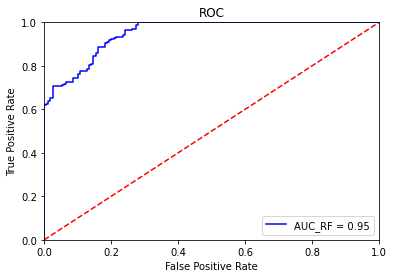

In [28]:
# Plot ROC curve for Random Forest classifier
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Next, you should plot ROC curves of BOTH classifiers in one plot. You should first get the probs, preds, fpr, tpr, and threshold for `xgb`. Your plot should be complete and match with the required specifications. A complete plot has title, axis labels and legend.

In [29]:
# Get class probabilities, fpr, tpr and threshold for XGBoost classifier
# Hint: It should be very similar to rf
xgb_probs = xgb.predict_proba(X_test)
xgb_preds = xgb_probs[:,1]
xgb_fpr, xgb_tpr, xgb_threshold = metrics.roc_curve(y_test, xgb_preds)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

Text(0.5, 0, 'False Positive Rate')

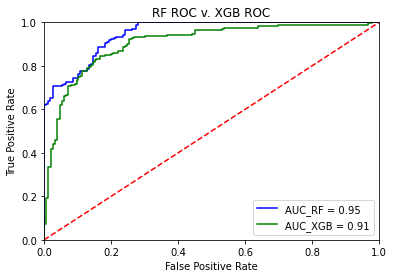

In [30]:
# Plot ROC for BOTH classifiers rf and xgb with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.

# Write as many number of lines of code as needed.

# Hint: You may use Random Forest ROC curve as a reference for writing your code
# Your plot should be complete with title, axis labels and legend
# Incomplete plots get zero credit!
plt.title('RF ROC v. XGB ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, 'g', label = 'AUC_XGB = %0.2f' % xgb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Part-III Questions

- Q4 [2 points]- Which classifier has a higher recall? You should include either your calculation or your code to compute the recall score. Add cells for your computation/code as necessary.
  - Answer: Random Forest Classifier has a higher recall score, as computed in the following cell.

In [31]:
xgb_tn, xgb_fp, xgb_fn, xgb_tp = xgb_matrix.ravel()
rf_tn, rf_fp, rf_fn, rf_tp = rf_matrix.ravel()

print("XGBoost Recall:", xgb_tp / (xgb_tp + xgb_fn))
print("Random Forest Recall:", rf_tp / (rf_tp + rf_fn))

XGBoost Recall: 0.8385416666666666
Random Forest Recall: 0.953125


- Q5 [2 points]- Checking the ROC curves of Random Forest and XGBoost, and without seeing AUC scores, how would you determine which classifier has a better performance? Explain.
  - Answer: Random Forest Classifier has better performance because the ROC curve plots True Positive Rate vs False Positive Rate. We want the ROC curve to be as close to the top left of the graph as possible, because a greater AUC indicates a better performing model.

## Grading

Assignment-1 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I - 20 points
   

- Part-II - 40 points
    - Implementation and results: 26 points
    - Part-II Questions: 14 points
    

- Part-III - 40 points
    - Implementation and results: 36 points **Note**: Incomplete GridSearch and/or ROC plots get zero credit!
    - Part-III Questions: 4 points
    

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A1.ipynb```. Submit the completed notebook using the ```Assignment-1``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Thursday Feb 18, 11:59PM.</b></font>